## Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


<B>Data
Variable</B>            Description

<B>Loan_ID</B>             Unique Loan ID

<B>Gender </B>             Male/ Female

<B>Married   </B>          Applicant married (Y/N)

<B>Dependents  </B>        Number of dependents

<B>Education </B>          Applicant Education (Graduate/ Under Graduate)

<B>Self_Employed </B>      Self employed (Y/N)

<B>ApplicantIncome</B>     Applicant income

<B>CoapplicantIncome</B>   Coapplicant income

<B>LoanAmount </B>         Loan amount in thousands

<B>Loan_Amount_Term </B>   Term of loan in months

<B>Credit_History </B>   credit history meets guidelines

<B>Property_Area </B>     Urban/ Semi Urban/ Rural

<B>Loan_Status </B>       Loan approved (Y/N)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Reading train and test dataset
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
print(f'shape of Train data {df_train.shape}')
print(f'shape of test data {df_test.shape}')

shape of Train data (614, 13)
shape of test data (367, 12)


In [4]:
#Concatenating train and test for cleaning and EDA
df=pd.concat([df_train,df_test],ignore_index=True)
print(f'shape of final dataframe {df.shape}')

shape of final dataframe (981, 13)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [6]:
#Checking missing values percentage for each column
df.isnull().sum()/df.shape[0]

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Credit_History       0.080530
Dependents           0.025484
Education            0.000000
Gender               0.024465
LoanAmount           0.027523
Loan_Amount_Term     0.020387
Loan_ID              0.000000
Loan_Status          0.374108
Married              0.003058
Property_Area        0.000000
Self_Employed        0.056065
dtype: float64

In [7]:
#Above we can see the percentage of missing values is very less ie within 10% for all the columns
#we can impute the missing values with median (continuous) or mode(categorical) or bfill/ffill method(>)
df.Credit_History=df.Credit_History.fillna(method='bfill')

In [8]:
df.Dependents.fillna(value=df.Dependents.mode()[0],inplace=True)

In [9]:
df.Gender.fillna(value=df.Gender.mode()[0],inplace=True)

In [10]:
df.LoanAmount.fillna(value=df.LoanAmount.median(),inplace=True)

In [11]:
df.Loan_Amount_Term.fillna(value=df.Loan_Amount_Term.mode()[0],inplace=True)

In [12]:
df.Married.fillna(value=df.Married.mode()[0],inplace=True)

In [13]:
df.Self_Employed.fillna(value=df.Self_Employed.mode()[0],inplace=True)

In [14]:
df.isnull().sum()/df.shape[0]

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Credit_History       0.000000
Dependents           0.000000
Education            0.000000
Gender               0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Loan_ID              0.000000
Loan_Status          0.374108
Married              0.000000
Property_Area        0.000000
Self_Employed        0.000000
dtype: float64

In [15]:
# All null values have been imputed

## EDA

## Univariate Analysis

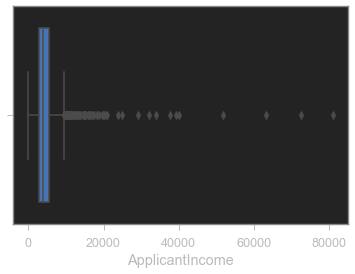

In [16]:
sns.boxplot(df.ApplicantIncome)
plt.show()

# We can clearly see large number of outliers and same is expected as we know wealth is never distributed equally
#and if we go by parito rule,80% wealth  is in hands of 20% people



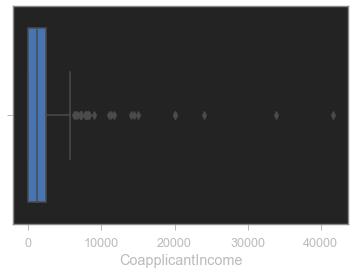

In [17]:
sns.boxplot(df.CoapplicantIncome)
plt.show()

# Coapplicant income distribution is same as applicant income. Highly positively skewed

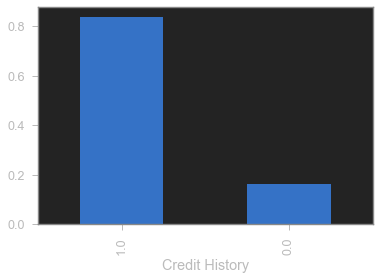

In [18]:
df.Credit_History.value_counts(1).plot.bar()
plt.xlabel('Credit History')
plt.show()
#More than 80% of applicants in dataset meet credit guidelines which increases their chances of getting loan

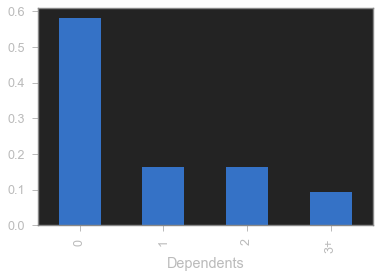

In [19]:
df.Dependents.value_counts(1).plot.bar()
plt.xlabel('Dependents')
plt.show()
# Close to 60% applicants have no dependents. This increases their chance of repayment of loan

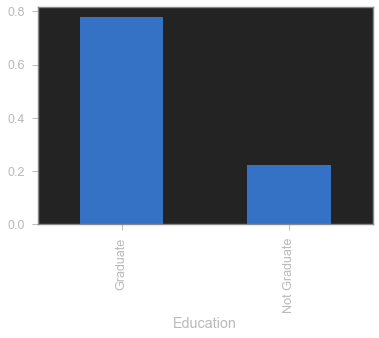

In [20]:
df.Education.value_counts(1).plot.bar()
plt.xlabel('Education')
plt.show()

#Almost 80 % applicants who applied for Loan are Graduate and it can be said loan from banks is preferred choice for educated
#whereas uneducated people or with less education level still prefer lending money from friends and other people

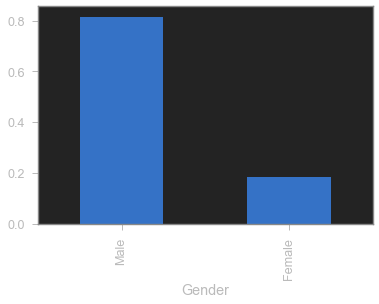

In [21]:
df.Gender.value_counts(1).plot.bar()
plt.xlabel('Gender')
plt.show()

#Around 80% applicants in dataset are male

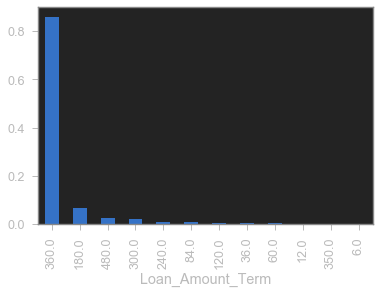

In [22]:
df.Loan_Amount_Term.value_counts(1).plot.bar()
plt.xlabel('Loan_Amount_Term')
plt.show()

#almost 85% applicants have taken loan for 30 years which clearly shows its a house loan dataset

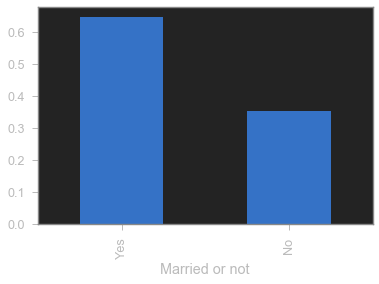

In [23]:
df.Married.value_counts(1).plot.bar()
plt.xlabel('Married or not')
plt.show()
#Married people are in more need of loan as they are planning to settle down and would not prefer rented accomodation

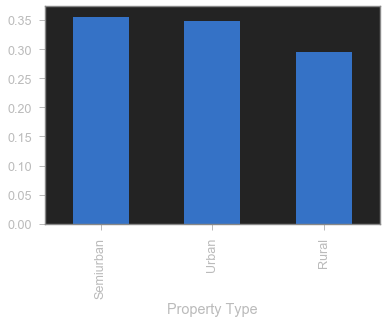

In [24]:
df.Property_Area.value_counts(1).plot.bar()
plt.xlabel('Property Type')
plt.show()

# % applicants from semi urban and urban is almost same and a little less for rural area

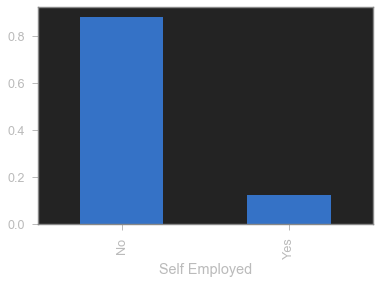

In [25]:
df.Self_Employed.value_counts(1).plot.bar()
plt.xlabel('Self Employed')
plt.show()

# More than 80 % of the applicants are not self employed 

## Bivariate Analysis

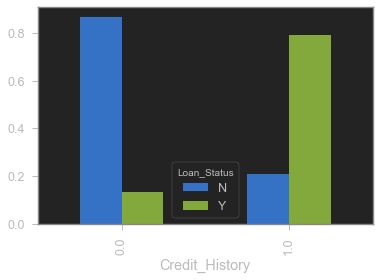

In [26]:
pd.crosstab(df.Credit_History,df.Loan_Status,normalize='index').plot.bar()
# Here we can see credit history being a significant factor for getting loan
# Applicants not following credit guidelines have high rejection rate and those following credit guidelines 
# have very low rejection rate

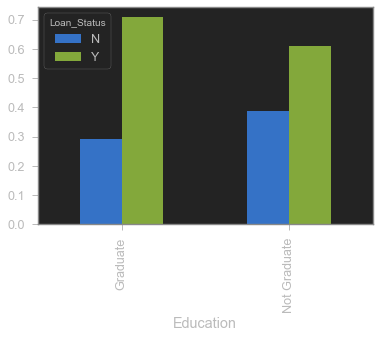

In [27]:
pd.crosstab(df.Education,df.Loan_Status,normalize='index').plot.bar()
#Clearly applicants with lower education level have high rejection rate

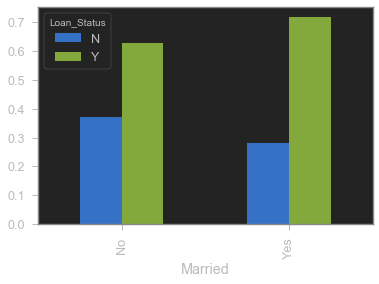

In [28]:
pd.crosstab(df.Married,df.Loan_Status,normalize='index').plot.bar()
#unmarried people have high rejection rate

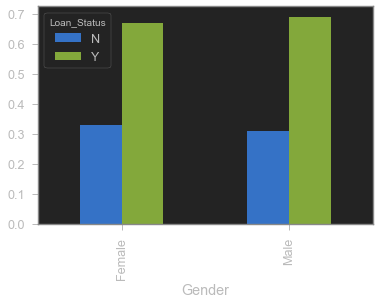

In [29]:
pd.crosstab(df.Gender,df.Loan_Status,normalize='index').plot.bar()
#We can say here rejection and acceptance of loan application is unbiased of gender
#So gender is not a significant feature for prediction

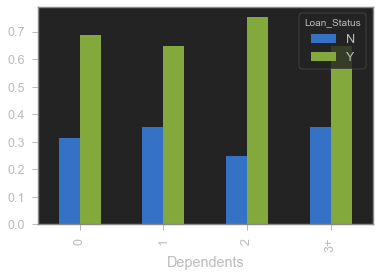

In [30]:
pd.crosstab(df.Dependents,df.Loan_Status,normalize='index').plot.bar()

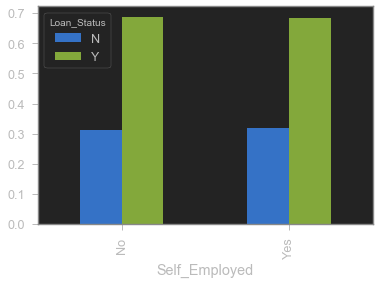

In [31]:
pd.crosstab(df.Self_Employed,df.Loan_Status,normalize='index').plot.bar()
#Acceptance and rejection is not affected as per employment status so it is not a significant feature

In [32]:
#Checking target class
df.Loan_Status.value_counts(1)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [33]:
#Checking categorical and numerical columns
print(df.select_dtypes('object').columns)

Index(['Dependents', 'Education', 'Gender', 'Loan_ID', 'Loan_Status',
       'Married', 'Property_Area', 'Self_Employed'],
      dtype='object')


In [34]:
print(df.select_dtypes('number').columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')


In [35]:
#Converting categorical columns to numeric for model
#df.Education.value_counts()
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})

In [36]:
df.Gender.value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [37]:
df.Gender=df.Gender.map({'Male':1,'Female':0})

In [38]:
df.Married.value_counts()

Yes    634
No     347
Name: Married, dtype: int64

In [39]:
df.Married=df.Married.map({'Yes':1,'No':0})

In [40]:
df.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [41]:
#Applying One hot encoding for Property area as it is a nominal column with more than 2 subcategories
df=pd.get_dummies(df,columns=['Property_Area'],drop_first=True,prefix='Prop_')

In [42]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})

In [43]:
df.Dependents=df.Dependents.replace({'3+':3})

In [44]:
df.Dependents=df.Dependents.astype(np.int32)

In [45]:
df.Loan_Status=df.Loan_Status.replace({'Y':1,'N':0})

In [46]:
df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Self_Employed,Prop__Semiurban,Prop__Urban
0,5849,0.0,1.0,0,1,1,126.0,360.0,LP001002,1.0,0,0,0,1
1,4583,1508.0,1.0,1,1,1,128.0,360.0,LP001003,0.0,1,0,0,0
2,3000,0.0,1.0,0,1,1,66.0,360.0,LP001005,1.0,1,1,0,1
3,2583,2358.0,1.0,0,0,1,120.0,360.0,LP001006,1.0,1,0,0,1
4,6000,0.0,1.0,0,1,1,141.0,360.0,LP001008,1.0,0,0,0,1


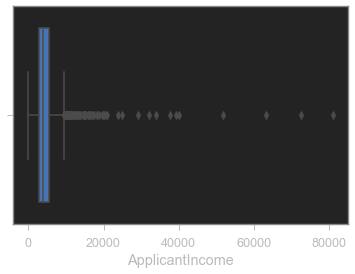

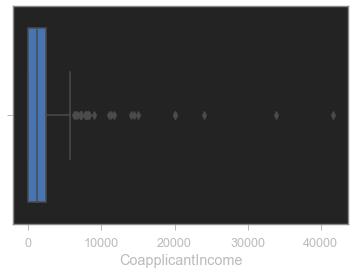

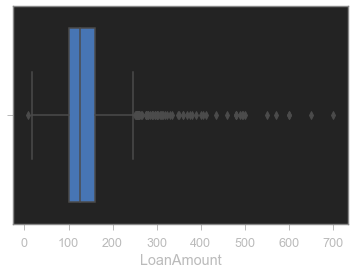

In [47]:
#Checking Outliers
for i in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    sns.boxplot(df[i])
    plt.show()

In [48]:
#adding 1 to columns to make data points >=0
for i in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    if(min(df[i])<=0):
        df[i]=df[i]+1

In [49]:
#Using boxcox transformation to treat outliers
from scipy.stats import boxcox
for i in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    df[i]=boxcox(df[i])[0]

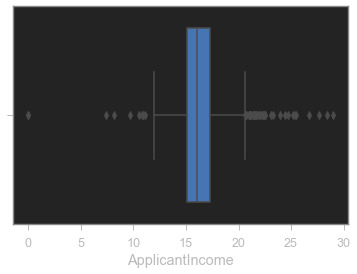

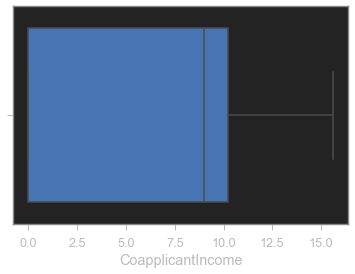

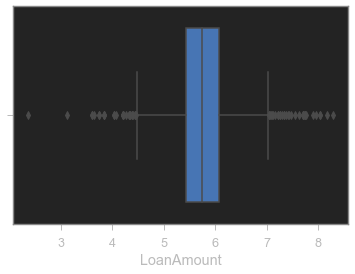

In [50]:
#Checking distribution after boxplot
for i in df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]:
    sns.boxplot(df[i])
    plt.show()

## MultiCollinearity

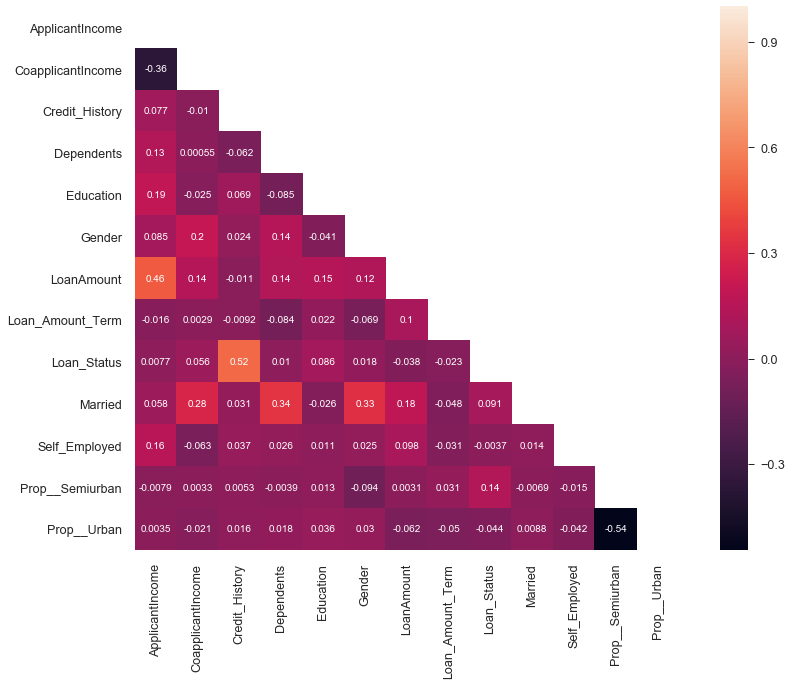

In [51]:
plt.figure(figsize=(15,10))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True)
    plt.show()

In [52]:
#There doesnt seem to be  any multi collinearity bw columns
#Credit History has high correlation with target so it seems to be a significant feature

## Building Model without feature extraction

In [53]:
#Dividing features and target variable
x=df.drop(columns=['Loan_Status','Loan_ID'])
y=df.Loan_Status

#Splitting dataframe back into train and test
x_train=x.iloc[:614,:]
x_test=x.iloc[614:,:]

y_train=df.iloc[:614,9:10]

y_train.shape

from sklearn.linear_model import LogisticRegression


In [54]:
lr=LogisticRegression(fit_intercept=True,max_iter=1000)
lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x_train,np.ravel(y_train),cv=10,scoring='accuracy').mean()

0.7998149127445795

In [58]:
y_pred=lr.predict(x_test)

In [59]:
y_pred.shape

(367,)

In [60]:
output=pd.DataFrame({'Loan_ID':df_test.Loan_ID,'Loan_Status':y_pred})

In [61]:
output.Loan_Status=output.Loan_Status.map({1:'Y',0:'N'})

In [62]:
output.to_csv('submission.csv',index=False)

## Feature Extraction
<ol>
<li>Feature extraction would reduce the dimensionality and make the model computationally better
<li>Total income and EMI is a better feature w.r.t to target(Loan Status) in comparison to individual separated columns

In [63]:
df['Total_Income']=df.ApplicantIncome+df.CoapplicantIncome
df['EMI']=df.LoanAmount/df.Loan_Amount_Term

In [64]:
#Dropping old columns and Gender,Self_Employed columns as well
df.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Gender','Self_Employed'],inplace=True)
df.shape

(981, 10)

In [65]:
#Dividing features and target variable
x=df.drop(columns=['Loan_Status','Loan_ID'])
y=df.Loan_Status



In [66]:
#Splitting dataframe back into train and test
x_train=x.iloc[:614,:]
x_test=x.iloc[614:,:]

y_train=df.iloc[:614,4:5]

## Building Logistic Regression Model after Feature Extraction

In [67]:
log=LogisticRegression(fit_intercept=True,max_iter=100)
log.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
cross_val_score(log,x_train,np.ravel(y_train),cv=3,scoring='accuracy').mean()

0.8013470428821936

In [70]:
y_pred=log.predict(x_test)

In [71]:
y_pred.shape

(367,)

In [72]:
output=pd.DataFrame({'Loan_ID':df_test.Loan_ID,'Loan_Status':y_pred})

In [73]:
output.Loan_Status=output.Loan_Status.map({1:'Y',0:'N'})

In [74]:
output.to_csv('submission.csv',index=False)

## Applying Tree based Models

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import lightgbm as lgbm

In [76]:
Classifier=[]

In [77]:
lgb=lgbm.LGBMClassifier()
Classifier.append(lgb)

rf=RandomForestClassifier()
Classifier.append(rf)

dtree=DecisionTreeClassifier()
Classifier.append(dtree)

xgb=xgboost.XGBClassifier()
Classifier.append(xgb)



In [78]:
for i in Classifier:
    print(f'Model {i}')
    i.fit(x_train,y_train)
    print('\n')
    print(f'Accuracy of train {cross_val_score(i,x_train,np.ravel(y_train),cv=3,scoring="accuracy").mean()}')
    print('\n')

Model LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)




D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of train 0.7508130081300813


Model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until




Accuracy of train 0.7622349752909293


Model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy of train 0.711764705882353


Model XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic'

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Accuracy of train 0.7247808066315957




### Feature Importance

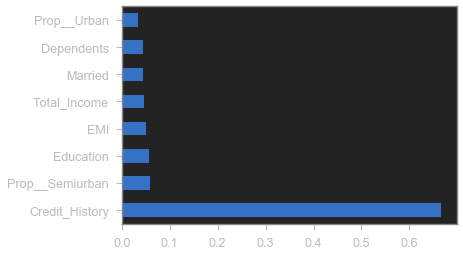

In [82]:
imp=pd.Series(xgb.feature_importances_,index=x_train.columns)
imp=imp.sort_values(ascending=False)
imp.plot(kind='barh')
plt.show()

In [578]:
y_pred=xgb.predict(x_test)

y_pred.shape

output=pd.DataFrame({'Loan_ID':df_test.Loan_ID,'Loan_Status':y_pred})

output.Loan_Status=output.Loan_Status.map({1:'Y',0:'N'})

output.to_csv('submission.csv',index=False)